<a href="https://www.kaggle.com/code/simronw/titanic-survival-prediction?scriptVersionId=176283242" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier

#importing labraries for logistics algorithm model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# # Loading dataset

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
x_gender = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Survived
0    549
1    342
Name: count, dtype: int64

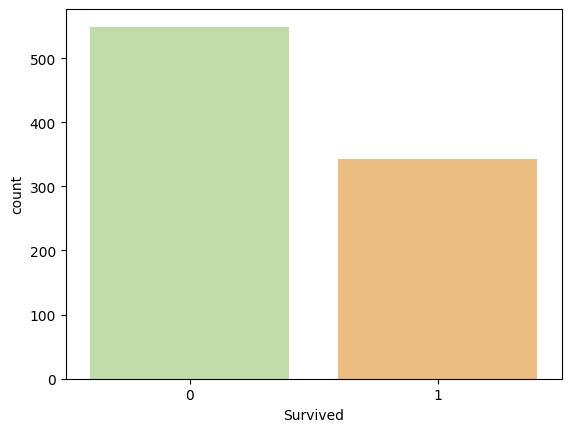

In [9]:
sns.countplot(x='Survived', palette = "Spectral_r", data = train_data)
train_data["Survived"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

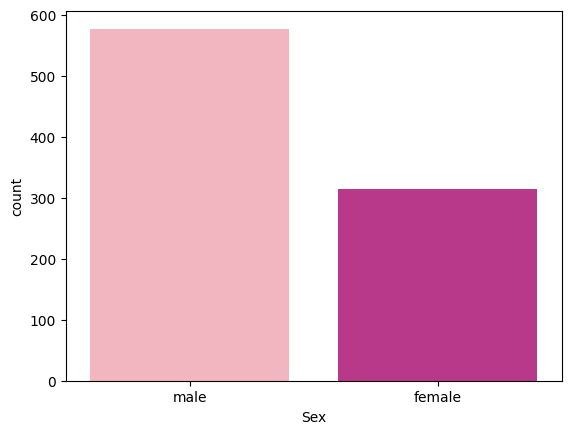

In [10]:
sns.countplot(x = "Sex", palette = "RdPu", data = train_data)
train_data["Sex"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

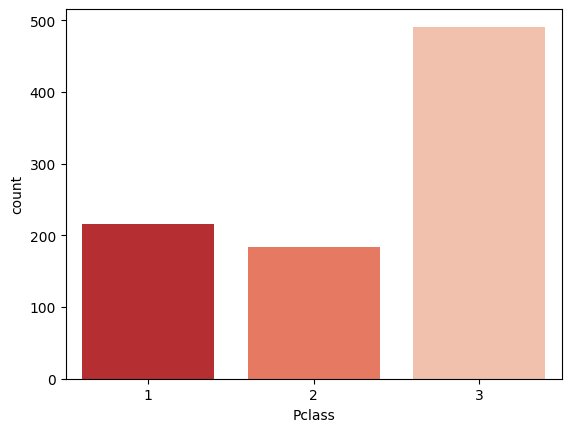

In [11]:
sns.countplot(x= "Pclass", palette = "Reds_r", data = train_data)
train_data["Pclass"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

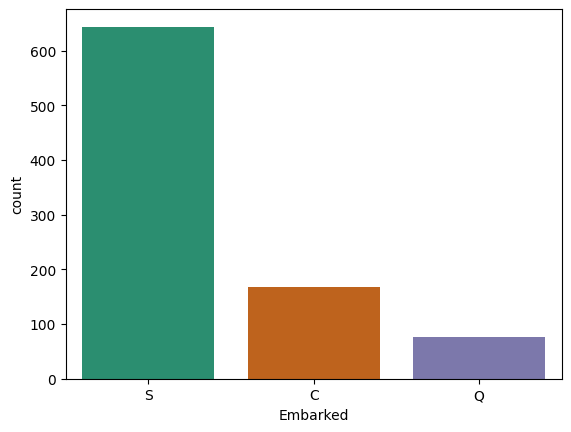

In [12]:
sns.countplot(x = "Embarked", palette = "Dark2", data = train_data)
train_data["Embarked"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

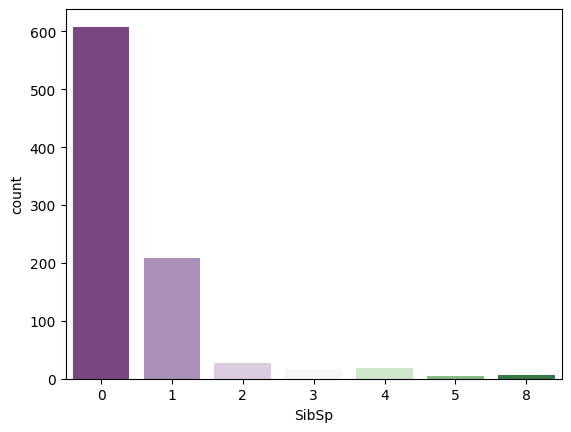

In [13]:
sns.countplot(x = "SibSp", palette = "PRGn", data = train_data)
train_data["SibSp"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

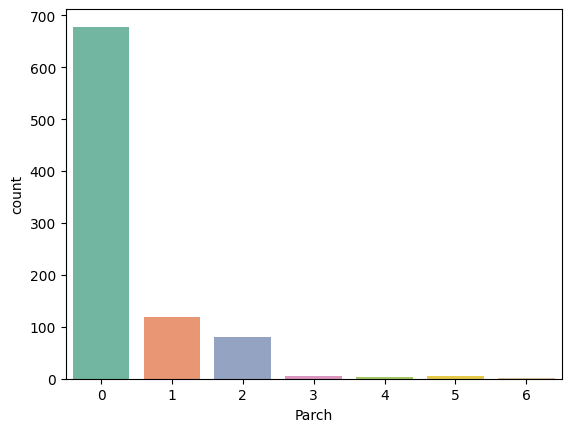

In [14]:
sns.countplot(x = "Parch", palette = "Set2", data = train_data)
train_data["Parch"].value_counts()

/tmp/ipykernel_18/2867755899.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x = "Fare", palette = "PuRd", data = train_data)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

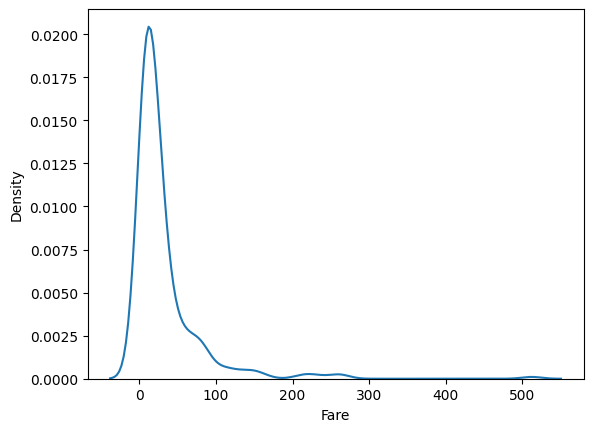

In [15]:
sns.kdeplot(x = "Fare", palette = "PuRd", data = train_data)
train_data["Fare"].value_counts()

In [16]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data.isnull().sum()

/tmp/ipykernel_18/2643482552.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data.isnull().sum()

/tmp/ipykernel_18/1738756101.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

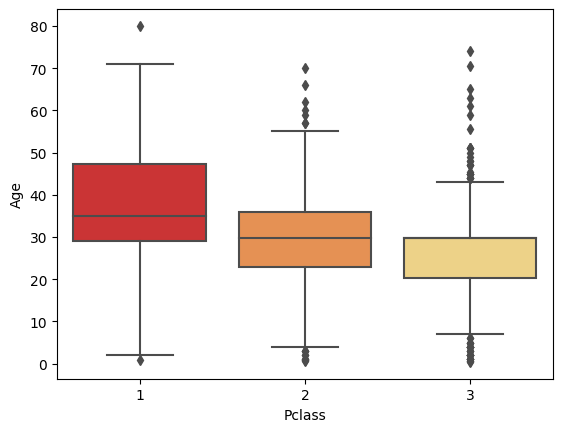

In [18]:
sns.boxplot(x="Pclass",y="Age",data=train_data, palette = "YlOrRd_r")
plt.show()

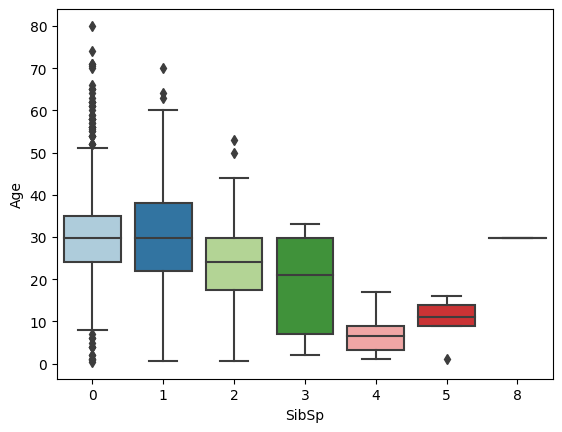

In [19]:
sns.boxplot(x="SibSp",y="Age",data=train_data, palette = "Paired")
plt.show()

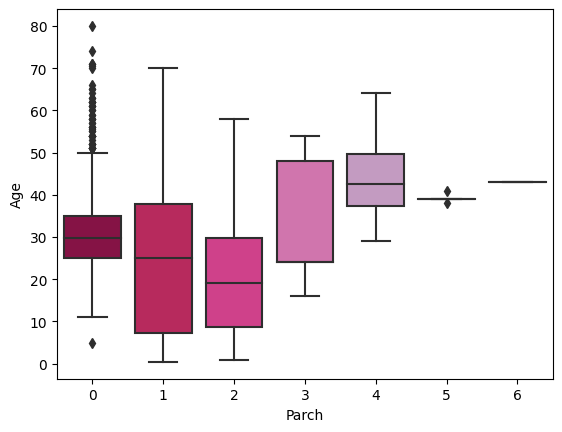

In [20]:
sns.boxplot(x="Parch",y="Age",data=train_data, palette = "PuRd_r")
plt.show()

In [21]:
# Imputing missing values with mode in train dataset
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
# Checking missing values 
train_data.isnull().sum()

/tmp/ipykernel_18/2566018058.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [22]:
# Imputing missing values with mode in test dataset
test_data['Fare'].fillna(train_data['Fare'].mode()[0], inplace=True)
# Checking missing values
test_data.isnull().sum()

/tmp/ipykernel_18/1287513738.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Fare'].fillna(train_data['Fare'].mode()[0], inplace=True)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [23]:
#Extracting the numerical Features
numerical_data = train_data.select_dtypes(exclude="object")
correlation = numerical_data.corr()
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


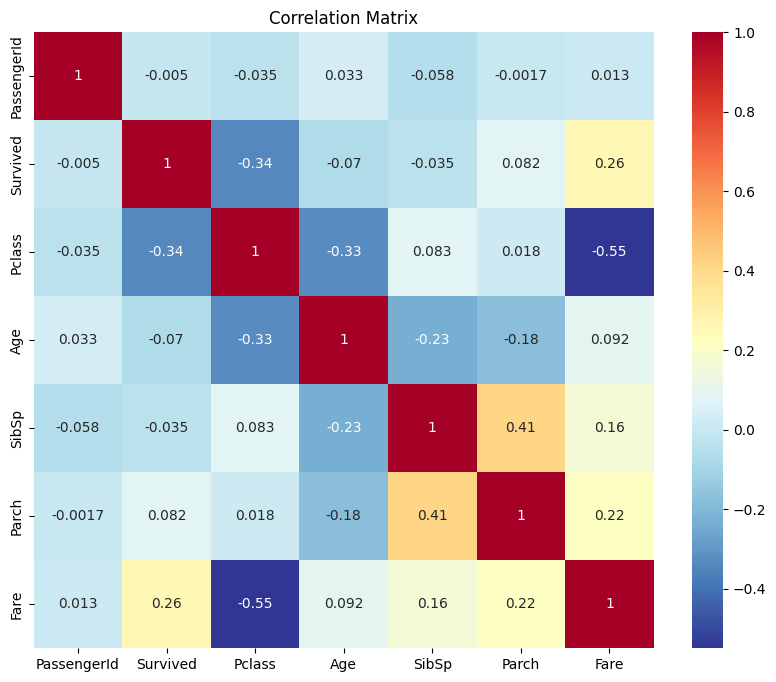

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='RdYlBu_r')
plt.title('Correlation Matrix')
plt.show()

In [25]:
#Code for the categorial columns ["Sex" and the "Embarked"] in train dataset
encoder = LabelEncoder()
coding_colums = ["Sex","Embarked"]
for code in coding_colums:
  train_data[code] = encoder.fit_transform(train_data[code]) 

In [26]:
#code for the categorial columns ["Sex" and the "Embarked"] in test dataset
encoder = LabelEncoder()
coding_colums = ["Sex","Embarked"]
for code in coding_colums:
  test_data[code] = encoder.fit_transform(test_data[code])


In [27]:
# Define features and target variable
features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(train_data[features])
y_train = train_data["Survived"]
X_test = pd.get_dummies(test_data[features])
y_test = x_gender['Survived']

# Ensure that both datasets have the same set of dummy variables
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

In [28]:
# Initialize and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test dataset
predictions = logistic_model.predict(X_test)

#calculat Accuaracy
acr = accuracy_score(y_test,predictions)
print(f'Accuracy_Score for Logistic Algorithm : {acr}')


Accuracy_Score for Logistic Algorithm : 0.992822966507177


<Axes: xlabel='Predicted', ylabel='Actual'>

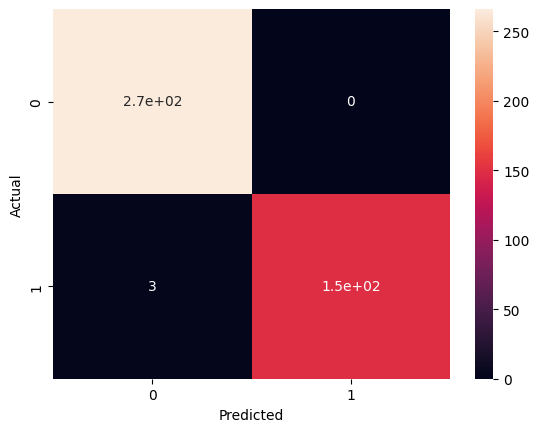

In [29]:
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [30]:
features = ["Pclass", "Sex", "SibSp", "Parch"]
y = train_data["Survived"]
X = pd.get_dummies(train_data[features])

In [31]:
r_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

#using Cross Validation for beter performance
from sklearn.model_selection import cross_val_score
score = cross_val_score(r_forest, X, y, cv=10)
score_ =sum(score)/10 

print(f'Avrage Accuaracy for Random Forest: {score_}')

Avrage Accuaracy for Random Forest: 0.7879275905118603


In [32]:
# Table the accuracy
accuracies = {
    'Models': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [acr, score_]
}


models = pd.DataFrame(accuracies)

models

,Models,Accuracy
0,Logistic Regression,0.992823
1,Random Forest,0.787928


<Axes: xlabel='Models'>

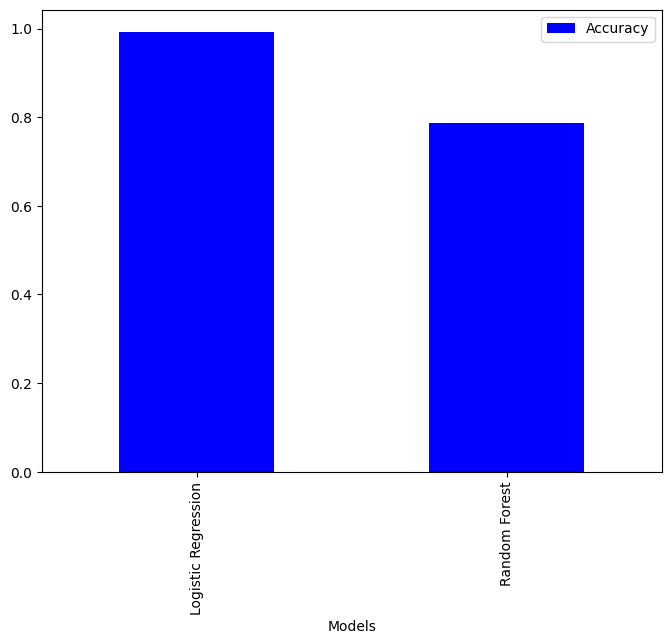

In [33]:
models[['Models', 'Accuracy']].plot(kind='bar', x='Models', y='Accuracy', color='blue', figsize=(8, 6))

In [34]:
# Output/submit file
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)